<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.6: Sentiment Analysis
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

Based on the video tutorial **Text Classification with Machine Learning,SpaCy and Scikit(Sentiment Analysis)** by **Jesse E. Agbe (JCharis)**.

## Data Source: UCI
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Dataset
- [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

### Abstract
The dataset contains sentences labelled with positive or negative sentiment.

- Data Set Characteristics: Text
- Number of Instances: 3000
- Area: N/A
- Attribute Characteristics: N/A
- Number of Attributes: N/A
- Date Donated: 2015-05-30
- Associated Tasks: Classification
- Missing Values? N/A
- Number of Web Hits: 102584

### Source
Dimitrios Kotzias dkotzias '@' ics.uci.edu

### Data Set Information
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

### Format
sentence &lt;tab&gt; score &lt;newline&gt;

### Details
Score is either 1 (for positive) or 0 (for negative)

The sentences come from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist **500 positive** and **500 negative** sentences. Those were selected randomly for larger datasets of reviews.

We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

For the full datasets look:

- **imdb**: Maas et. al., 2011 _Learning word vectors for sentiment analysis_
- **amazon**: McAuley et. al., 2013 _Hidden factors and hidden topics: Understanding rating dimensions with review text_
- **yelp**: [Yelp dataset challenge](http://www.yelp.com/dataset_challenge)


### Attribute Information
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

### Relevant Papers
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

### Citation Request
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

## Import libraries

In [1]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Load data

Load Yelp, Amazon and Imdb Data.

Hint: Source is separated by <tab>s and has no headers.

In [2]:
yelp_text = 'yelp_labelled.txt'
imdb_text = 'imdb_labelled_fixed.txt'
amazon_text = 'amazon_cells_labelled.txt'

# ANSWER

In [20]:
input_file = '..\\DATA\\yelp_labelled.txt'
with open(input_file, 'r') as a:
    yelp_text = a.read()
    


In [21]:
input_file = '..\\DATA\\imdb_labelled_fixed.txt'
with open(input_file, 'r') as b:
    imdb_text = b.read()
    


In [22]:
input_file = '..\\DATA\\amazon_cells_labelled.txt'
with open(input_file, 'r') as c:
    amazon_text = c.read()
    


In [62]:
yelp_text = '..\\DATA\\yelp_labelled.txt'
imdb_text = '..\\DATA\\imdb_labelled_fixed.txt'
amazon_text = '..\\DATA\\amazon_cells_labelled.txt'

files= [yelp_text,imdb_text,amazon_text]

dfs=[pd.read_csv(f, header=None, sep='\t') for f in files]
dfs[0].head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Inspect the data

Check your datasets.

In [8]:
# ANSWER
yelp_text

'Wow... Loved this place.\t1\nCrust is not good.\t0\nNot tasty and the texture was just nasty.\t0\nStopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\nThe selection on the menu was great and so were the prices.\t1\nNow I am getting angry and I want my damn pho.\t0\nHoneslty it didn\'t taste THAT fresh.)\t0\nThe potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\nThe fries were great too.\t1\nA great touch.\t1\nService was very prompt.\t1\nWould not go back.\t0\nThe cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\nI tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\nI was disgusted because I was pretty sure that was human hair.\t0\nI was shocked because no signs indicate cash only.\t0\nHighly recommended.\t1\nWaitress was a little slow in service.\t0\nThis place is not worth your time, let alone Vegas.\t0\ndid not like at all.\

In [10]:
imdb_text

"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0\nNot sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0\nAttempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0\nVery little music or anything to speak of.  \t0\nThe best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1\nThe rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0\nWasted two hours.  \t0\nSaw the movie today and thought it was a good effort, good messages for kids.  \t1\nA bit predictable.  \t0\nLoved the casting of Jimmy Buffet as the science teacher.  \t1\nAnd those baby owls were adorable.  \t1\nThe movie showed a lot of Florida at it's best, made it look very appealing.  \t1\nThe Song

In [11]:
amazon_text

'So there is no way for me to plug it in here in the US unless I go by a converter.\t0\nGood case, Excellent value.\t1\nGreat for the jawbone.\t1\nTied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\nThe mic is great.\t1\nI have to jiggle the plug to get it to line up right to get decent volume.\t0\nIf you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\nIf you are Razr owner...you must have this!\t1\nNeedless to say, I wasted my money.\t0\nWhat a waste of money and time!.\t0\nAnd the sound quality is great.\t1\nHe was very impressed when going from the original battery to the extended battery.\t1\nIf the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\nVery good quality though\t1\nThe design is very odd, as the ear "clip" is not very comfortable at all.\t0\nHighly recommend for any one who has a blue tooth phone.\t1\nI advise EVERYON

## Merge the data

Merge all three datasets.

In [ ]:
yelp_text = 'yelp_labelled.txt'
imdb_text = 'imdb_labelled_fixed.txt'
amazon_text = 'amazon_cells_labelled.txt'

In [57]:
# ANSWER
data = yelp_text
data += "\n"
data += imdb_text
data += "\n"
data += amazon_text
  
with open ('..\\DATA\\file3.csv', 'w') as fp:
    fp.write(data)

In [33]:
input_file = '..\\DATA\\file3.txt'
with open(input_file, 'r') as d:
    merged_text = d.read()

In [34]:
merged_text

'Wow... Loved this place.\t1\nCrust is not good.\t0\nNot tasty and the texture was just nasty.\t0\nStopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\nThe selection on the menu was great and so were the prices.\t1\nNow I am getting angry and I want my damn pho.\t0\nHoneslty it didn\'t taste THAT fresh.)\t0\nThe potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\nThe fries were great too.\t1\nA great touch.\t1\nService was very prompt.\t1\nWould not go back.\t0\nThe cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\nI tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\nI was disgusted because I was pretty sure that was human hair.\t0\nI was shocked because no signs indicate cash only.\t0\nHighly recommended.\t1\nWaitress was a little slow in service.\t0\nThis place is not worth your time, let alone Vegas.\t0\ndid not like at all.\

## Export the data

Export merged datasets to as csv file.

In [63]:
# ANSWER
combined_df=pd.concat(dfs)
combined_df.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [65]:
renamed_df: pd.DataFrame = combined_df.rename(mapper={0: "text",1:"sentiment"},axis=1)
renamed_df.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Prepare the stage
- Load spaCy

In [40]:
nlp = spacy.load('en_core_web_sm')
    

## Prepare the text
All the text handling and preparation concerned with the changes and modifications from the raw source text to a format that will be used for the actual processing, things like:
- handle encoding
- handle extraneous and international charaters
- handle simbols
- handle metadata and embeded information
- handle repetitions (such multiple spaces or newlines)

Clean text.

In [36]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)

    return text

In [66]:
# ANSWER
clean_text=clean_text(renamed_df)

TypeError: 'str' object is not callable

## Work the text
Concern with the meaning and the substance of the content to extract actual information.

Hint: Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.

In [ ]:
def convert_text(text):
    '''
    Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.
    '''
    return text

In [68]:
def convert_text(tweet):
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', '', tweet)  # remove hashtags
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[!"#\$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', tweet)  # remove punctuations
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    tweet = re.sub('\s+$', '', tweet)  # remove extra whitespace
    return tweet

In [69]:
%%time
renamed_df['short'] = renamed_df['text'].apply(convert_text)

Wall time: 136 ms


In [71]:
renamed_df.sample(10)

,text,sentiment,short
79,"He is an amazing film artist, one of the most ...",1,He is an amazing film artist one of the most i...
767,I am so tired of clichés that is just lazy wri...,0,I am so tired of clichés that is just lazy wri...
841,I'm still trying to get over how bad it was.,0,Im still trying to get over how bad it was
910,I highly doubt that anyone could ever like thi...,0,I highly doubt that anyone could ever like thi...
97,Food arrived quickly!,1,Food arrived quickly
991,Painful on the ear.,0,Painful on the ear
464,The inside is really quite nice and very clean.,1,The inside is really quite nice and very clean
329,When my mom and I got home she immediately got...,0,When my mom and I got home she immediately got...
895,I want to first say our server was great and w...,1,I want to first say our server was great and w...
630,I had always known that Errol Flynn was a bril...,1,I had always known that Errol Flynn was a bril...


## Modelling

In [72]:
# helper function to show results and charts
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

In [73]:
# Features and Labels
X = renamed_df['short']
y = renamed_df['sentiment']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Use Bag-of-Words

In [74]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [75]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [76]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [80]:
# train the classifier with the training data
# classifier.fit(A.toarray(), y_train) #A and B need to be same either toarray or sparse matrix
classifier.fit(A, y_train)

SVC(kernel='linear', probability=True)

In [81]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [82]:
# make predictions based on the test data
predictions = classifier.predict(B)
predictions

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [83]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8217


## Repeat using TF-IDF
TF-IDF = Term Frequency - Inverse Document Frequency

In [86]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
#classifier.fit(A.toarray(), y_train)
classifier.fit(A, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(B)

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8300


## Repeating it all for comparision
Repeating the whole lot in one big block

Find 'Accuracy', 'Precision', 'Recall', 'ROC_AUC' using CountVectorizer and TfidfVectorizer and keep the result in a dataframe.

Accuracy : 0.8300 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8389 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8224 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8301                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


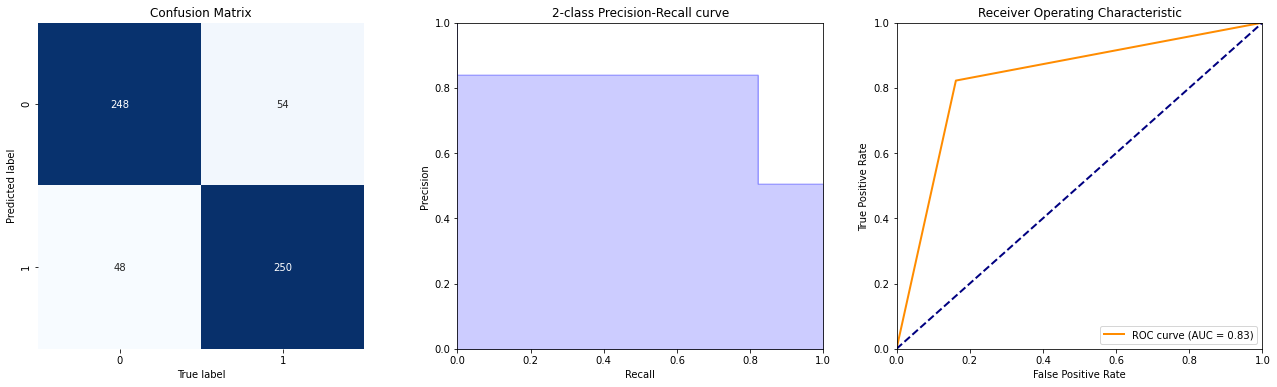

(0.83, 0.8389261744966443, 0.8223684210526315, 0.8301031294452347)

In [87]:
# ANSWER

show_summary_report(y_test,predictions)